## Iris classification

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [4]:
X0 = X[np.where(y==0)]
X1 = X[np.where(y==1)]

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'Probability')

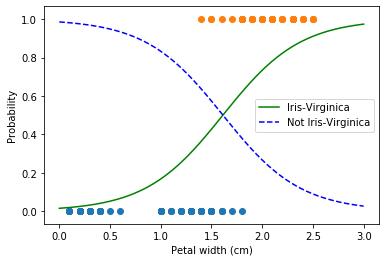

In [6]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.scatter(X0,y[np.where(y==0)])
plt.scatter(X1,y[np.where(y==1)])
plt.legend()
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')

In [7]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax

In [8]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

In [9]:
X0 = X[np.where(y==0)]
X1 = X[np.where(y==1)]
X2 = X[np.where(y==2)]
y0 = y[np.where(y==0)]
y1 = y[np.where(y==1)]
y2 = y[np.where(y==2)]

In [10]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10) # if multinomial is set, softmax, else OvA
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

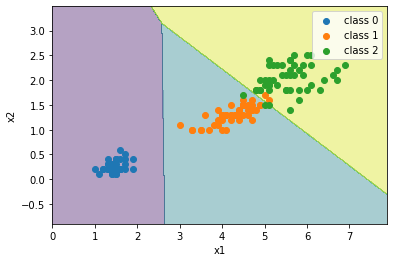

In [12]:
# obtain decision boundary
resolution = 0.01
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min, x2_max,resolution))
xx = np.append(xx1.flatten()[:,np.newaxis],xx2.flatten()[:,np.newaxis],axis=1)
yy = softmax_reg.predict(xx)

plt.contourf(xx1, xx2, yy.reshape(*(xx1.shape)), alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X0[:,0],X0[:,1],label='class 0')
plt.scatter(X1[:,0],X1[:,1],label='class 1')
plt.scatter(X2[:,0],X2[:,1],label='class 2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()